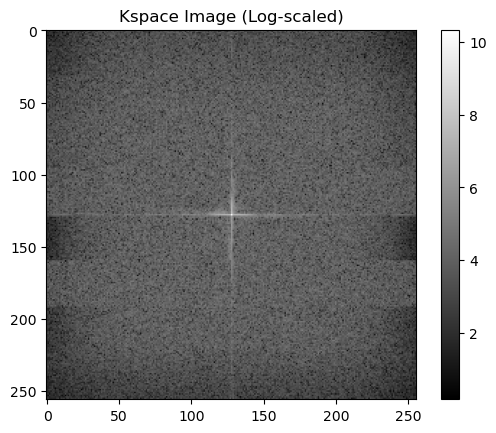

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift
from skimage.transform import resize

# 定义参数
rotate_range = [-10, 10]  # 旋转范围
vertical_trans_range = [-0.1, 0.1]  # 垂直平移范围
horizontal_trans_range = [-0.1, 0.1]  # 水平平移范围
rounds = 8  # 阶段数

# 加载MRI图像，假设您已经将其加载到名为 'mri_image' 的变量中

# 假设 mri_image 是您的MRI图像数据的占位符
mri_image = np.random.random((256, 256))

# 初始化K空间数组
k_space = np.zeros_like(mri_image, dtype=np.complex64)

# 计算每轮的步长
step_size = mri_image.shape[0] // rounds

for i in range(rounds):
    # 随机应用旋转和平移
    angle = np.random.uniform(rotate_range[0], rotate_range[1])
    vertical_shift = np.random.uniform(vertical_trans_range[0], vertical_trans_range[1]) * mri_image.shape[0]
    horizontal_shift = np.random.uniform(horizontal_trans_range[0], horizontal_trans_range[1]) * mri_image.shape[1]

    rotated_image = rotate(mri_image, angle, reshape=False)
    shifted_image = shift(rotated_image, (vertical_shift, horizontal_shift))

    # 执行傅里叶变换
    k_space_chunk = np.fft.fftshift(np.fft.fft2(shifted_image))

    # 计算存储当前K空间块的索引
    start_index = i * step_size
    end_index = (i + 1) * step_size

    # 将当前K空间块存储到K空间数组中的相应位置
    k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

# 显示最终K空间数据的对数幅度图像
plt.imshow(np.log1p(np.abs(k_space)), cmap='gray')
plt.title('Kspace Image (Log-scaled)')
plt.colorbar()
plt.show()


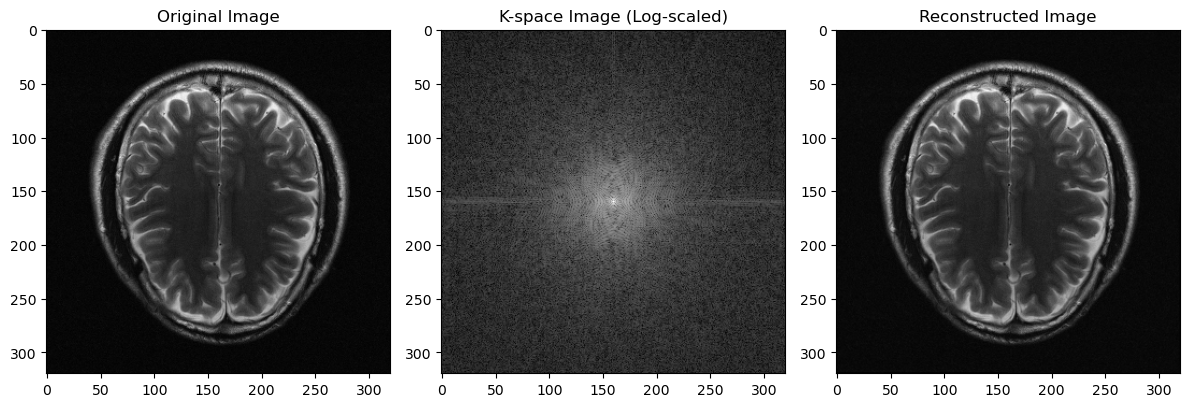

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift
from skimage.io import imread
from skimage.transform import resize

# 定义参数
rotate_range = [-5, 5]  # 旋转范围
vertical_trans_range = [-0, 0]  # 垂直平移范围（像素）
horizontal_trans_range = [-0, 0]  # 水平平移范围（像素）
rounds = 2  # 阶段数

# 加载输入图像
# image_path = r"C:\Users\LinziGoooosh\Desktop\b55_1583_Slice--1.png"
image_path = r"C:\Users\LinziGoooosh\Desktop\b55_1311_Slice--1.png"
original_image = imread(image_path, as_gray=True)

# 初始化K空间数组
k_space = np.zeros_like(original_image, dtype=np.complex64)

# 计算每轮的步长
step_size = original_image.shape[0] // rounds

# 显示原图像
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

current_image = original_image.copy()

for i in range(rounds):
    # 中间rounds次的图像不处理

    if i == rounds // 2:

        # 执行傅里叶变换
        k_space_chunk = np.fft.fftshift(np.fft.fft2(original_image))

        # 计算存储当前K空间块的索引
        start_index = i * step_size
        end_index = (i + 1) * step_size

        # 将当前K空间块存储到K空间数组中的相应位置
        k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

        continue

    # 随机应用旋转和平移
    angle = np.random.uniform(rotate_range[0], rotate_range[1])
    vertical_shift = np.random.randint(vertical_trans_range[0], vertical_trans_range[1] + 1)
    horizontal_shift = np.random.randint(horizontal_trans_range[0], horizontal_trans_range[1] + 1)

    rotated_image = rotate(current_image, angle, reshape=False)
    shifted_image = shift(rotated_image, (vertical_shift, horizontal_shift))

    # 执行傅里叶变换
    k_space_chunk = np.fft.fftshift(np.fft.fft2(shifted_image))

    # 计算存储当前K空间块的索引
    start_index = i * step_size
    end_index = (i + 1) * step_size

    # 将当前K空间块存储到K空间数组中的相应位置
    k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

    # 更新当前图像，用于下一个阶段的处理
    #current_image = shifted_image.copy()


# 显示K空间图像
plt.subplot(132)
plt.imshow(np.log1p(np.abs(k_space)), cmap='gray')
plt.title('K-space Image (Log-scaled)')

# 重建图像（逆傅里叶变换）
reconstructed_image = abs(np.fft.ifft2(np.fft.ifftshift(k_space)))

# 显示重建图像
plt.subplot(133)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()


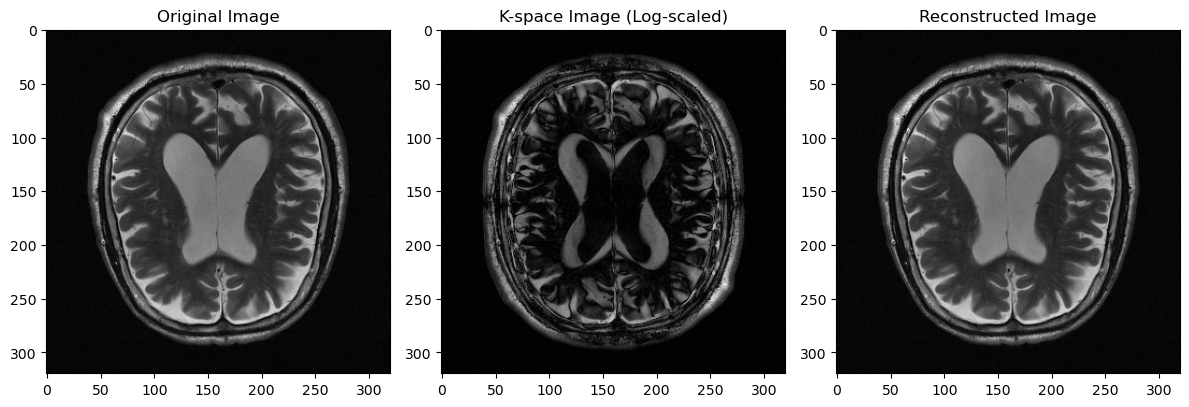

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift
from skimage.io import imread
from skimage.transform import resize

# 定义参数
rotate_range = [-0, 0]  # 旋转范围
vertical_trans_range = [-0, 0]  # 垂直平移范围（像素）
horizontal_trans_range = [-0, 0]  # 水平平移范围（像素）
rounds = 1  # 阶段数

# 加载输入图像
image_path = r"C:\Users\LinziGoooosh\Desktop\b55_1583_Slice--1.png"
original_image = imread(image_path, as_gray=True)

# 初始化K空间数组
k_space = np.zeros_like(original_image, dtype=np.complex64)

# 计算每轮的步长
step_size = original_image.shape[0] // rounds

# 显示原图像
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

current_image = original_image.copy()

for i in range(rounds):
    # 中间rounds次的图像不处理
    if i == rounds // 2:

        # 执行傅里叶变换
        k_space_chunk = np.fft.fftshift(np.fft.fft2(original_image))

        # 计算存储当前K空间块的索引
        start_index = i * step_size
        end_index = (i + 1) * step_size

        # 将当前K空间块存储到K空间数组中的相应位置
        k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

        continue
    # 随机应用旋转和平移
    angle = np.random.uniform(rotate_range[0], rotate_range[1])
    vertical_shift = np.random.randint(vertical_trans_range[0], vertical_trans_range[1] + 1)
    horizontal_shift = np.random.randint(horizontal_trans_range[0], horizontal_trans_range[1] + 1)

    rotated_image = rotate(current_image, angle, reshape=False)
    shifted_image = shift(rotated_image, (vertical_shift, horizontal_shift))

    # 执行傅里叶变换
    k_space_chunk = np.fft.fftshift(np.fft.fft2(shifted_image))

    # 计算存储当前K空间块的索引
    start_index = i * step_size
    end_index = (i + 1) * step_size

    # 将当前K空间块存储到K空间数组中的相应位置
    k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

    # 更新当前图像，用于下一个阶段的处理
    current_image = shifted_image.copy()


# 显示K空间图像
plt.subplot(132)
plt.imshow(abs(np.fft.ifft2(k_space.imag)), cmap='gray')
plt.title('K-space Image (Log-scaled)')

# 重建图像（逆傅里叶变换）
reconstructed_image = np.fft.ifft2(np.fft.ifftshift(k_space)).real

# 显示重建图像
plt.subplot(133)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()


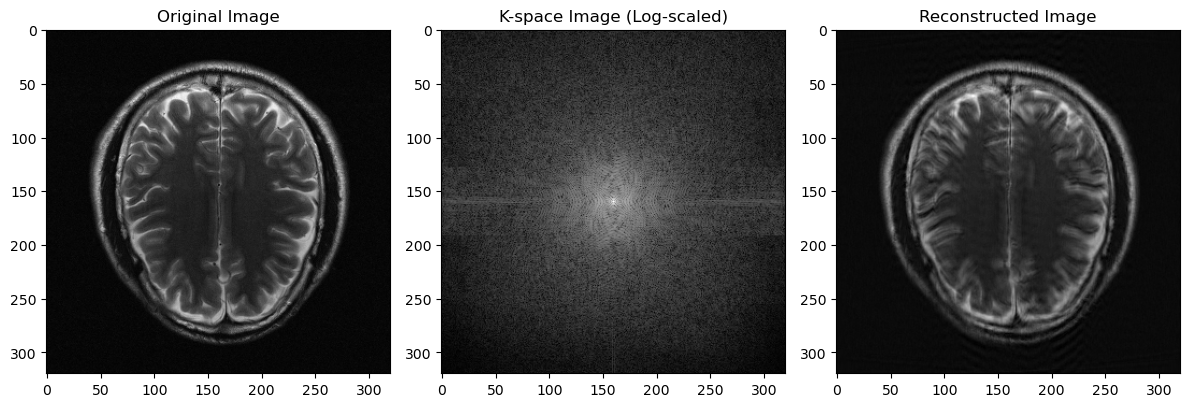

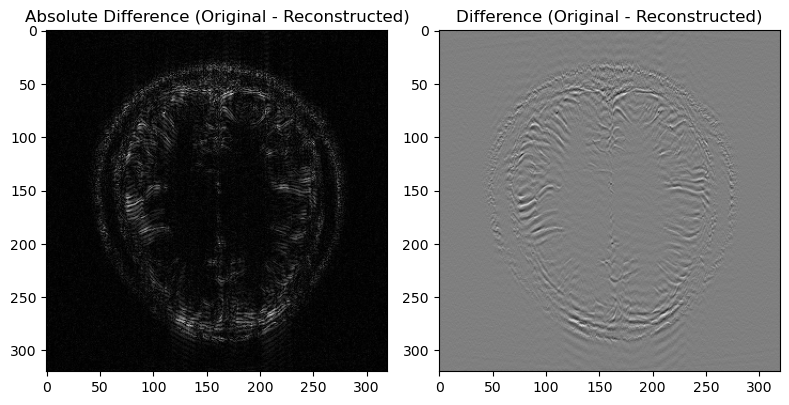

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift
from skimage.io import imread
from skimage.transform import resize

# 定义参数
rotate_range = [-5, 5]  # 旋转范围
vertical_trans_range = [-1, 1]  # 垂直平移范围（像素）
horizontal_trans_range = [-1, 1]  # 水平平移范围（像素）
rounds = 5  # 阶段数

# 加载输入图像
# image_path = r"C:\Users\LinziGoooosh\Desktop\b55_1583_Slice--1.png"
image_path = r"C:\Users\LinziGoooosh\Desktop\b55_1311_Slice--1.png"
original_image = imread(image_path, as_gray=True)

# 初始化K空间数组
k_space = np.zeros_like(original_image, dtype=np.complex64)

# 计算每轮的步长
step_size = original_image.shape[0] // rounds

# 显示原图像
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

current_image = original_image.copy()

for i in range(rounds):
    # 中间rounds次的图像不处理
    if i == rounds // 2:
        # 执行傅里叶变换
        k_space_chunk = np.fft.fftshift(np.fft.fft2(original_image))

        # 计算存储当前K空间块的索引
        start_index = i * step_size
        end_index = (i + 1) * step_size

        # 将当前K空间块存储到K空间数组中的相应位置
        k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

        continue

    # 随机应用旋转和平移
    angle = np.random.uniform(rotate_range[0], rotate_range[1])
    vertical_shift = np.random.randint(vertical_trans_range[0], vertical_trans_range[1] + 1)
    horizontal_shift = np.random.randint(horizontal_trans_range[0], horizontal_trans_range[1] + 1)

    rotated_image = rotate(current_image, angle, reshape=False)
    shifted_image = shift(rotated_image, (vertical_shift, horizontal_shift))

    # 执行傅里叶变换
    k_space_chunk = np.fft.fftshift(np.fft.fft2(shifted_image))

    # 计算存储当前K空间块的索引
    start_index = i * step_size
    end_index = (i + 1) * step_size

    # 将当前K空间块存储到K空间数组中的相应位置
    k_space[start_index:end_index, :] = k_space_chunk[start_index:end_index, :]

    # 更新当前图像，用于下一个阶段的处理
    current_image = shifted_image.copy()

# 显示K空间图像
plt.subplot(132)
plt.imshow(np.log1p(np.abs(k_space)), cmap='gray')
plt.title('K-space Image (Log-scaled)')

# 重建图像（逆傅里叶变换）
reconstructed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(k_space)))

# 显示重建图像
plt.subplot(133)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()

# 对原始图像和重建图像做差并展示
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(np.abs(original_image - reconstructed_image), cmap='gray')
plt.title('Absolute Difference (Original - Reconstructed)')

plt.subplot(122)
plt.imshow(original_image - reconstructed_image, cmap='gray')
plt.title('Difference (Original - Reconstructed)')

plt.tight_layout()
plt.show()


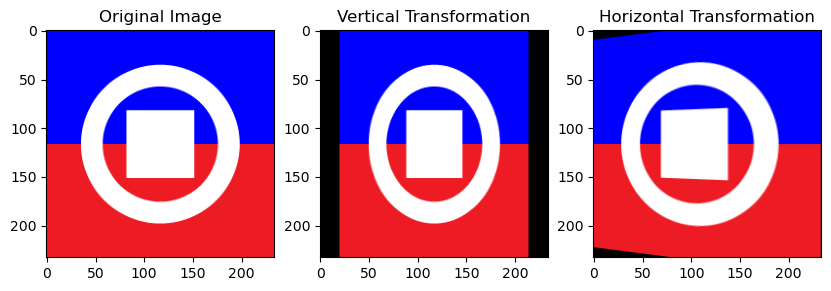

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r'C:\Users\LinziGoooosh\Desktop\b55.png'
image = cv2.imread(image_path)

# 获取图像的高度和宽度
height, width = image.shape[:2]

# Motion process
perspective_prob: [0.3, 0.3, 0.4]  # pitch, yaw, keep
perspective_range: [0.1, 0.2] # 期望概率分布符合正态分布
stretch_prob: [0.3, 0.3, 0.4]  # expand, shrink, keep
stretch_range: [0.8, 1.2] # 期望概率分布符合正态分布

# 定义垂直和水平变形的目标点
pitch_rate1 = -20
pitch_rate2 = -20
stretch_rate1 = 0
stretch_rate2 = 0
yaw_rate1 = -10
yaw_rate2 = 20


raw_pts = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
pitch_pts = np.float32([[0 - pitch_rate1, 0 - stretch_rate1], [width + pitch_rate1, 0 - stretch_rate1],
                        [0 - pitch_rate2, height + stretch_rate2], [width + pitch_rate2, height + stretch_rate2]])

yaw_pts = np.float32([[0 - stretch_rate1, 0 - yaw_rate1], [width + stretch_rate2, 0 - yaw_rate2],
                      [0 - stretch_rate1, height + yaw_rate1], [width + stretch_rate2, height + yaw_rate2]])


# 计算垂直和水平变形的透视变换矩阵
vertical_matrix = cv2.getPerspectiveTransform(raw_pts, pitch_pts)
horizontal_matrix = cv2.getPerspectiveTransform(raw_pts, yaw_pts)

# 应用垂直和水平变形
vertical_result = cv2.warpPerspective(image, vertical_matrix, (width, height))
horizontal_result = cv2.warpPerspective(image, horizontal_matrix, (width, height))
# 应用垂直和水平变形，使用cv2.BORDER_REPLICATE填充越界区域
#vertical_result = cv2.warpPerspective(image, vertical_matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)
#horizontal_result = cv2.warpPerspective(image, horizontal_matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)

# 水平对比展示原始图像和变形后的图像

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(vertical_result, cv2.COLOR_BGR2RGB))
plt.title('Vertical Transformation')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(horizontal_result, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Transformation')

plt.show()


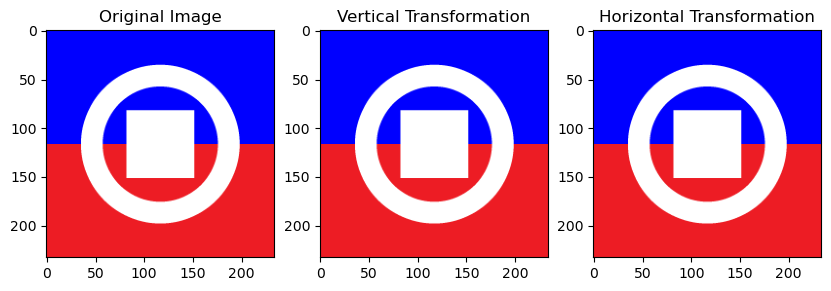

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r'C:\Users\LinziGoooosh\Desktop\b55.png'
image = cv2.imread(image_path)

# 获取图像的高度和宽度
height, width = image.shape[:2]

# 定义四个垂直和水平变形的目标点
vertical_pts = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
horizontal_pts = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# 计算垂直和水平变形的透视变换矩阵
vertical_matrix = cv2.getPerspectiveTransform(np.float32([[0, 0], [width, 0], [0, height], [width, height]]), vertical_pts)
horizontal_matrix = cv2.getPerspectiveTransform(np.float32([[0, 0], [width, 0], [0, height], [width, height]]), horizontal_pts)

# 应用垂直和水平变形
vertical_result = cv2.warpPerspective(image, vertical_matrix, (width, height))
horizontal_result = cv2.warpPerspective(image, horizontal_matrix, (width, height))

# 水平对比展示原始图像和变形后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(vertical_result, cv2.COLOR_BGR2RGB))
plt.title('Vertical Transformation')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(horizontal_result, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Transformation')

plt.show()


In [29]:
import random

# 定义可选的元素序列
options = ['up', 'down', 'keep']

# 定义每个元素对应的权重
weights = [0.2, 0.3, 0.5]

# 使用random.choices进行随机选择
result = random.choices(options, weights, k=2)

print(result)


['keep', 'keep']


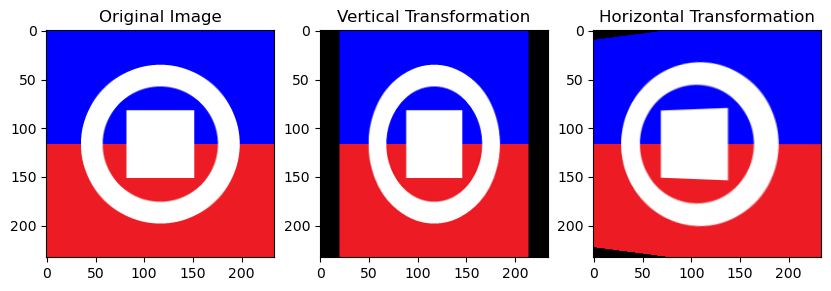

In [6]:
import torch
from torchvision.transforms.functional import perspective as perspective_transform
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r'C:\Users\LinziGoooosh\Desktop\b55.png'
image2_path = r'C:\Users\LinziGoooosh\Desktop\b55_1583_Slice--1.png'
image = Image.open(image_path)
image2 = Image.open(image2_path)

# 获取图像的高度和宽度
width, height = image.size

# 定义垂直和水平变形的目标点
pitch_rate1 = -20
pitch_rate2 = -20
stretch_rate1 = 0
stretch_rate2 = 0
yaw_rate1 = -10
yaw_rate2 = 20

raw_pts = [[0, 0], [width, 0], [0, height], [width, height]]
pitch_pts = [[0 - pitch_rate1, 0 - stretch_rate1], [width + pitch_rate1, 0 - stretch_rate1],
             [0 - pitch_rate2, height + stretch_rate2], [width + pitch_rate2, height + stretch_rate2]]

yaw_pts = [[0 - stretch_rate1, 0 - yaw_rate1], [width + stretch_rate2, 0 - yaw_rate2],
           [0 - stretch_rate1, height + yaw_rate1], [width + stretch_rate2, height + yaw_rate2]]

# 转换为PyTorch Tensor
raw_pts = torch.tensor(raw_pts, dtype=torch.float32)
pitch_pts = torch.tensor(pitch_pts, dtype=torch.float32)
yaw_pts = torch.tensor(yaw_pts, dtype=torch.float32)

# 进行透视变换
vertical_result = perspective_transform(image, raw_pts, pitch_pts)
horizontal_result = perspective_transform(image, raw_pts, yaw_pts)

# 水平对比展示原始图像和变形后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.array(image))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.array(vertical_result))
plt.title('Vertical Transformation')

plt.subplot(1, 3, 3)
plt.imshow(np.array(horizontal_result))
plt.title('Horizontal Transformation')

plt.show()


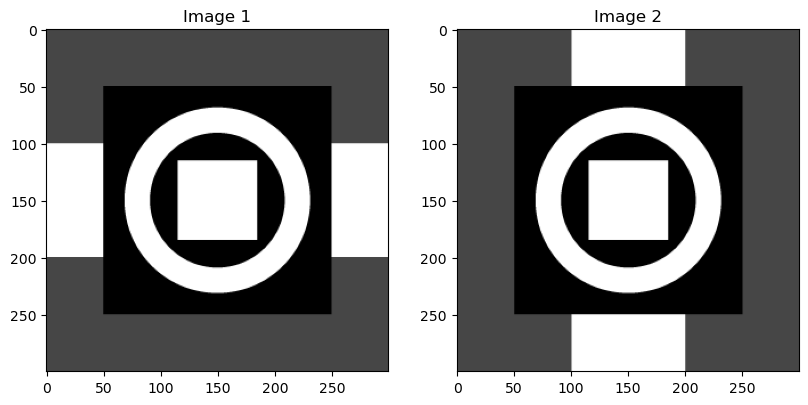

In [25]:
import torch
from torchvision.transforms.functional import perspective as perspective_transform
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r"C:\Users\LinziGoooosh\Desktop\b01.png"
image2_path = r"C:\Users\LinziGoooosh\Desktop\b02.png"
image = Image.open(image_path).convert("L")  # 转换为灰度模式
image2 = Image.open(image2_path).convert("L")

# 获取图像的高度和宽度
width, height = image.size

# Resize images to have the same dimensions
# width, height = image.size
# image2 = image2.resize((width, height))

# Combine images into a single RGB image
combined_image = np.array([np.array(image), np.array(image2)])

# 定义透视和拉伸的概率与范围
perspective_prob = [0.4, 0.4, 0.2]  # pitch, yaw, keep
perspective_range = [-0.1, 0.1]  # 图像尺寸百分比
stretch_prob = [0.5, 0.3, 0.2]  # expand, shrink, keep
stretch_range = [-0.05, 0.05]  # 图像尺寸百分比

# 随机选取透视变换的形式和值
selected_perspective = np.random.choice(["pitch", "yaw", "keep"], p=perspective_prob)
pitch_rate1 = np.random.uniform(-perspective_range[0], perspective_range[0])
pitch_rate2 = np.random.uniform(-perspective_range[0], perspective_range[0])
yaw_rate1 = np.random.uniform(-perspective_range[1], perspective_range[1])
yaw_rate2 = np.random.uniform(-perspective_range[1], perspective_range[1])

# 随机选取拉伸的形式和值
selected_stretch = np.random.choice(["expand", "shrink", "keep"], p=stretch_prob)
stretch_rate1 = np.random.uniform(stretch_range[0], stretch_range[1])
stretch_rate2 = np.random.uniform(stretch_range[0], stretch_range[1])

# 定义变形的目标点
raw_pts = [[0, 0], [width, 0], [0, height], [width, height]]
if selected_perspective == "pitch":
    pitch_pts = [
        [0 - pitch_rate1 * width, 0 - stretch_rate1 * height],
        [width + pitch_rate1 * width, 0 - stretch_rate1 * height],
        [0 - pitch_rate2 * width, height + stretch_rate2 * height],
        [width + pitch_rate2 * width, height + stretch_rate2 * height],
    ]
    yaw_pts = raw_pts
elif selected_perspective == "yaw":
    yaw_pts = [
        [0 - stretch_rate1 * width, 0 - yaw_rate1 * height],
        [width + stretch_rate2 * width, 0 - yaw_rate2 * height],
        [0 - stretch_rate1 * width, height + yaw_rate1 * height],
        [width + stretch_rate2 * width, height + yaw_rate2 * height],
    ]
    pitch_pts = raw_pts
else:  # selected_perspective == 'keep'
    pitch_pts = raw_pts
    yaw_pts = raw_pts

# 转换为 PyTorch Tensor
raw_pts = torch.tensor(raw_pts, dtype=torch.float32)
pitch_pts = torch.tensor(pitch_pts, dtype=torch.float32)
yaw_pts = torch.tensor(yaw_pts, dtype=torch.float32)

# 进行透视变换
combined_image = torch.tensor(combined_image, dtype=torch.float32)
combined_result = perspective_transform(combined_image, raw_pts, pitch_pts)

# 水平对比展示原始图像和变形后的图像
# Iterate through the stack of images and display them
plt.figure(figsize=(15, 5))

for i in range(combined_result.shape[0]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(combined_result[i], cmap="gray")  # Assuming images are grayscale
    plt.title(f"Image {i+1}")

plt.show()

(2, 300, 300)


C:\Users\LinziGoooosh\AppData\Local\Temp\ipykernel_11640\3753950508.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  stretch_pts = torch.tensor(stretch_pts, dtype=torch.float32)


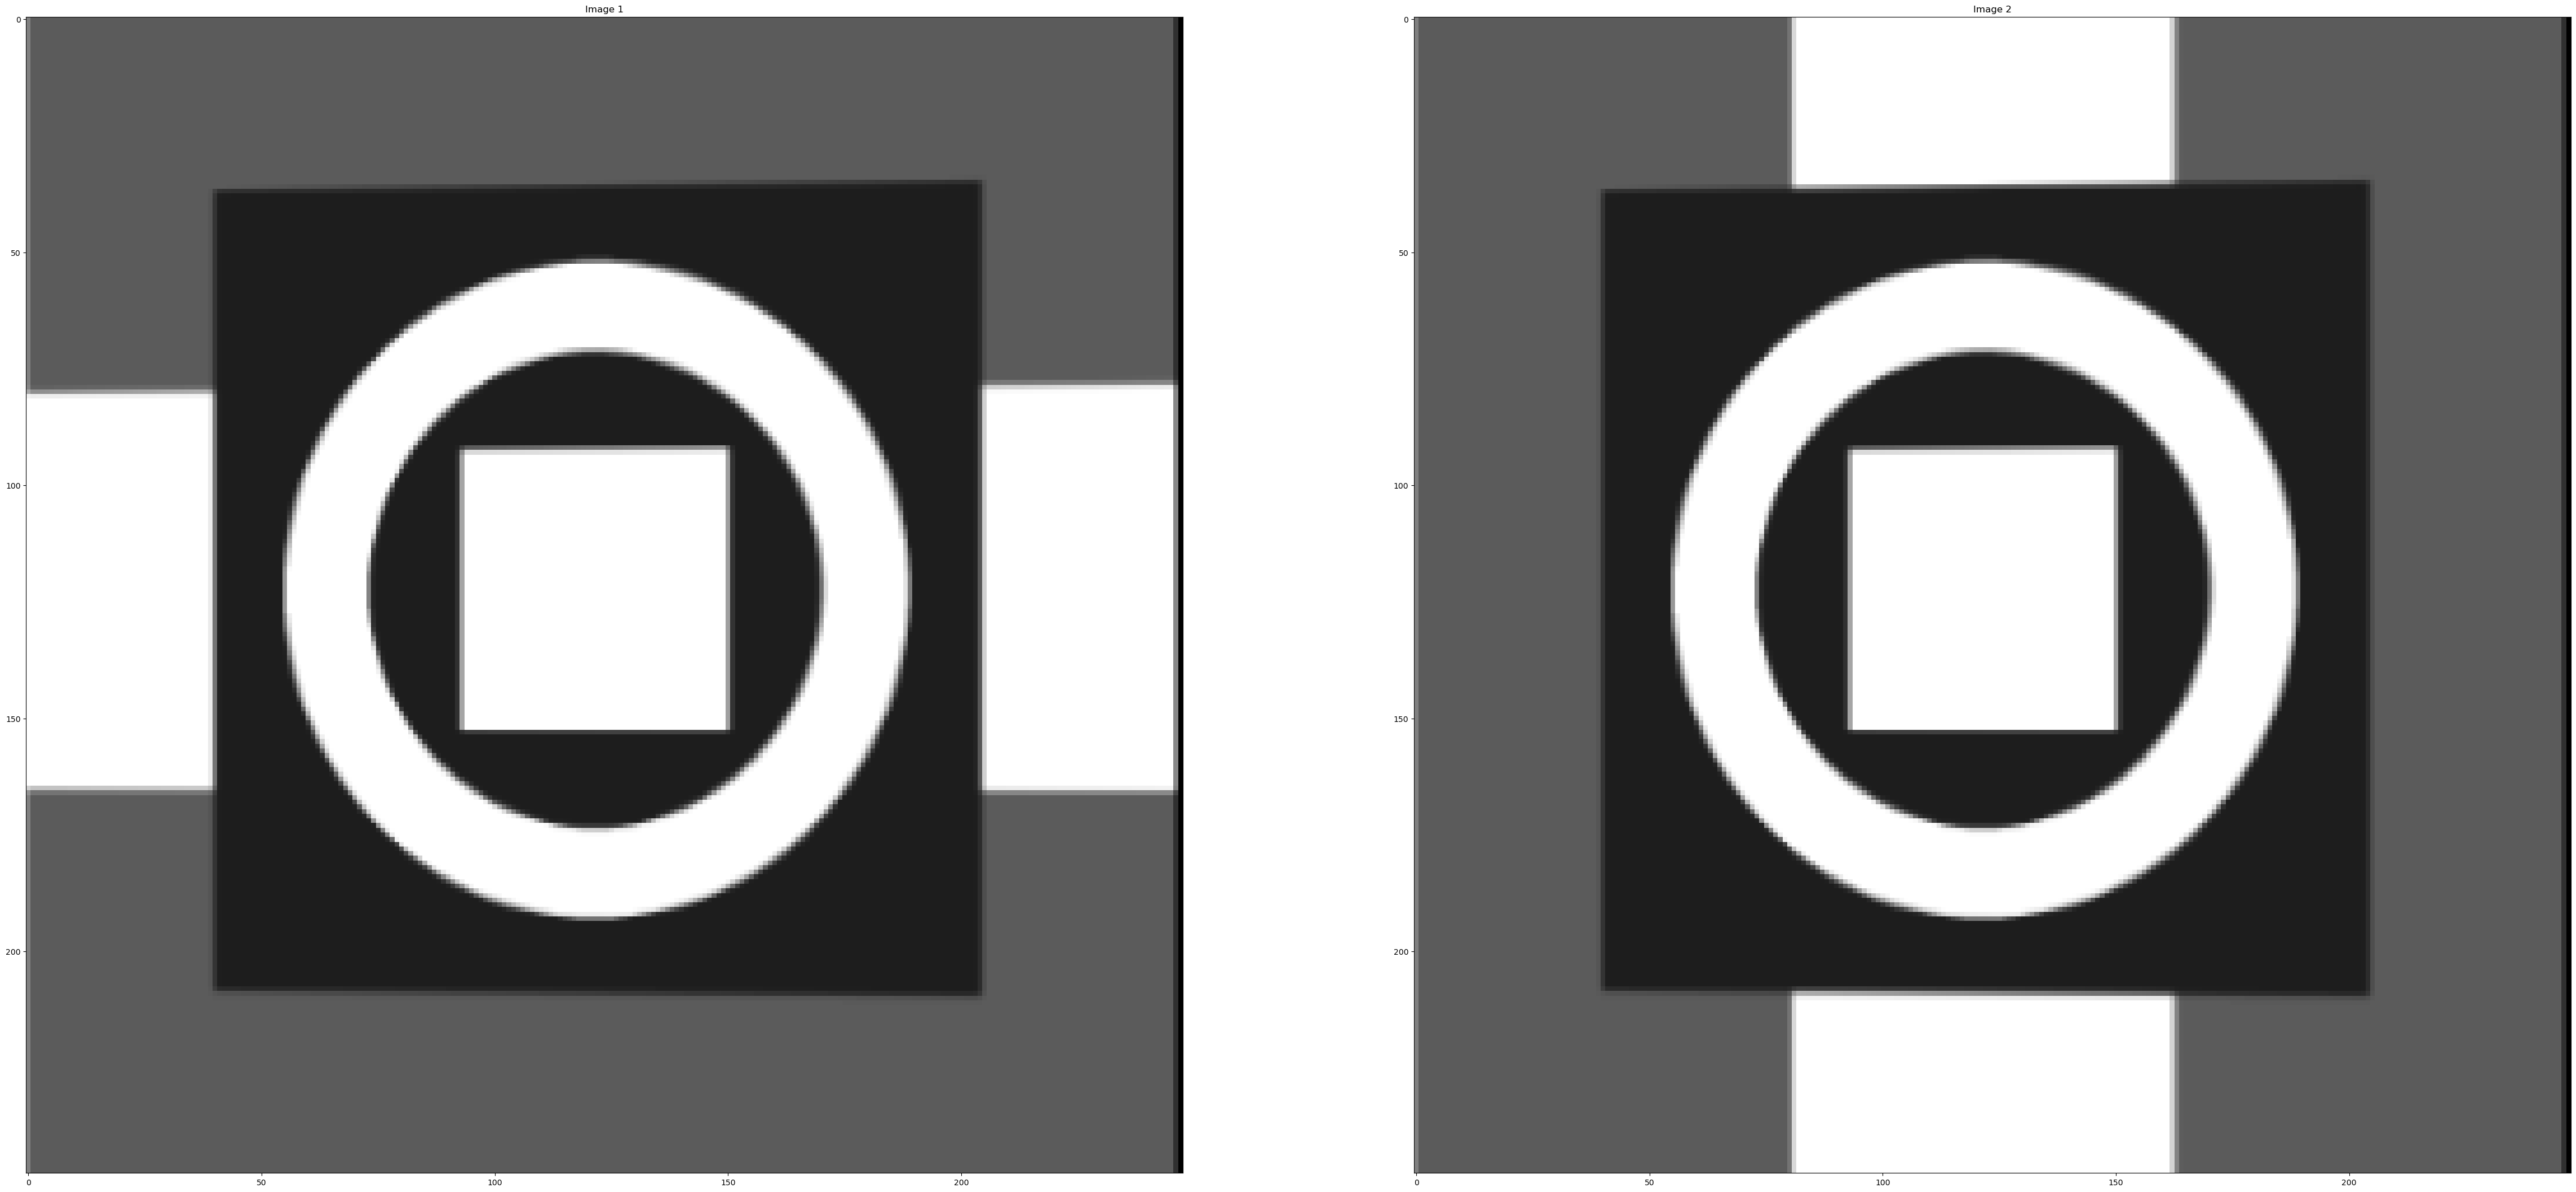

In [204]:
import torch
from torchvision.transforms.functional import perspective as perspective_transform
from torchvision.transforms.functional import rotate, resize
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r"C:\Users\LinziGoooosh\Desktop\b01.png"
image2_path = r"C:\Users\LinziGoooosh\Desktop\b02.png"
image = Image.open(image_path).convert("L")  # 转换为灰度模式
image2 = Image.open(image2_path).convert("L")

# 获取图像的高度和宽度
width, height = image.size
# Combine images into a single RGB image
combined_image = np.array([np.array(image), np.array(image2)])
print(combined_image.shape)
combined_image = torch.tensor(combined_image, dtype=torch.float32)

# -------------- resize_images -------------- #
resize_prob = 0.9
resize_range = [0.8, 1.2]  # 图像尺寸百分比

if np.random.uniform(0, 1) < resize_prob:
    resize_rate = np.random.uniform(resize_range[0], resize_range[1])
    combined_image = resize(combined_image, (int(height * resize_rate), int(width * resize_rate)), interpolation=InterpolationMode.BILINEAR)

# -------------- rotation_transform -------------- #
rotate_prob = 0.5
rotate_range = [-5, 5] # the range of rotation(旋转范围)

if np.random.uniform(0, 1) < rotate_prob:
    rotate_angle = np.random.uniform(rotate_range[0], rotate_range[1])
    combined_image = rotate(combined_image, rotate_angle, interpolation = InterpolationMode.BILINEAR)
# -------------- perspective_transform -------------- #

# Resize images to have the same dimensions
# width, height = image.size
# image2 = image2.resize((width, height))

# 定义透视和拉伸的概率与范围
perspective_prob = [0.3, 0.3, 0.4]  # pitch, yaw, keep
perspective_range = [-0.1, 0.1]  # 图像尺寸百分比
stretch_prob = 0.4
stretch_range = [-0.05, 0.05]  # 图像尺寸百分比

# 随机选取透视变换的形式和值
selected_perspective = np.random.choice(["pitch", "yaw", "keep"], p=perspective_prob)
pitch_rate1 = np.random.uniform(-perspective_range[0], perspective_range[0])
pitch_rate2 = np.random.uniform(-perspective_range[0], perspective_range[0])
yaw_rate1 = np.random.uniform(-perspective_range[1], perspective_range[1])
yaw_rate2 = np.random.uniform(-perspective_range[1], perspective_range[1])

# 随机选取拉伸的形式和值
if np.random.uniform(0, 1) < stretch_prob:
    stretch_rate1 = np.random.uniform(stretch_range[0], stretch_range[1])
    stretch_rate2 = np.random.uniform(stretch_range[0], stretch_range[1])
else:
    stretch_rate1 = 0
    stretch_rate2 = 0

# 定义变形的目标点
raw_pts = [[0, 0], [width, 0], [0, height], [width, height]]
if selected_perspective == "pitch":
    pitch_pts = [
        [0 - pitch_rate1 * width, 0 - stretch_rate1 * height],
        [width + pitch_rate1 * width, 0 - stretch_rate1 * height],
        [0 - pitch_rate2 * width, height + stretch_rate2 * height],
        [width + pitch_rate2 * width, height + stretch_rate2 * height],
    ]
    yaw_pts = raw_pts
elif selected_perspective == "yaw":
    yaw_pts = [
        [0 - stretch_rate1 * width, 0 - yaw_rate1 * height],
        [width + stretch_rate2 * width, 0 - yaw_rate2 * height],
        [0 - stretch_rate1 * width, height + yaw_rate1 * height],
        [width + stretch_rate2 * width, height + yaw_rate2 * height],
    ]
    pitch_pts = raw_pts
else:  # selected_perspective == 'keep'
    pitch_pts = raw_pts
    yaw_pts = raw_pts
    stretch_pts = [
        [0 , 0 - stretch_rate1 * height],
        [width, 0 - stretch_rate1 * height],
        [0 , height + stretch_rate2 * height],
        [width, height + stretch_rate2 * height],
    ]

# 转换为 PyTorch Tensor
raw_pts = torch.tensor(raw_pts, dtype=torch.float32)
pitch_pts = torch.tensor(pitch_pts, dtype=torch.float32)
yaw_pts = torch.tensor(yaw_pts, dtype=torch.float32)
stretch_pts = torch.tensor(stretch_pts, dtype=torch.float32)

# 进行透视变换
if selected_perspective == "pitch":
    combined_result = perspective_transform(combined_image, raw_pts, pitch_pts)
elif selected_perspective == "yaw":
    combined_result = perspective_transform(combined_image, raw_pts, yaw_pts)
else:
    combined_result = perspective_transform(combined_image, raw_pts, stretch_pts)

# 水平对比展示原始图像和变形后的图像
# Iterate through the stack of images and display them
plt.figure(figsize=(90, 30))

for i in range(combined_result.shape[0]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(combined_result[i], cmap="gray")  # Assuming images are grayscale
    plt.title(f"Image {i+1}")

plt.show()

(3, 300, 300)


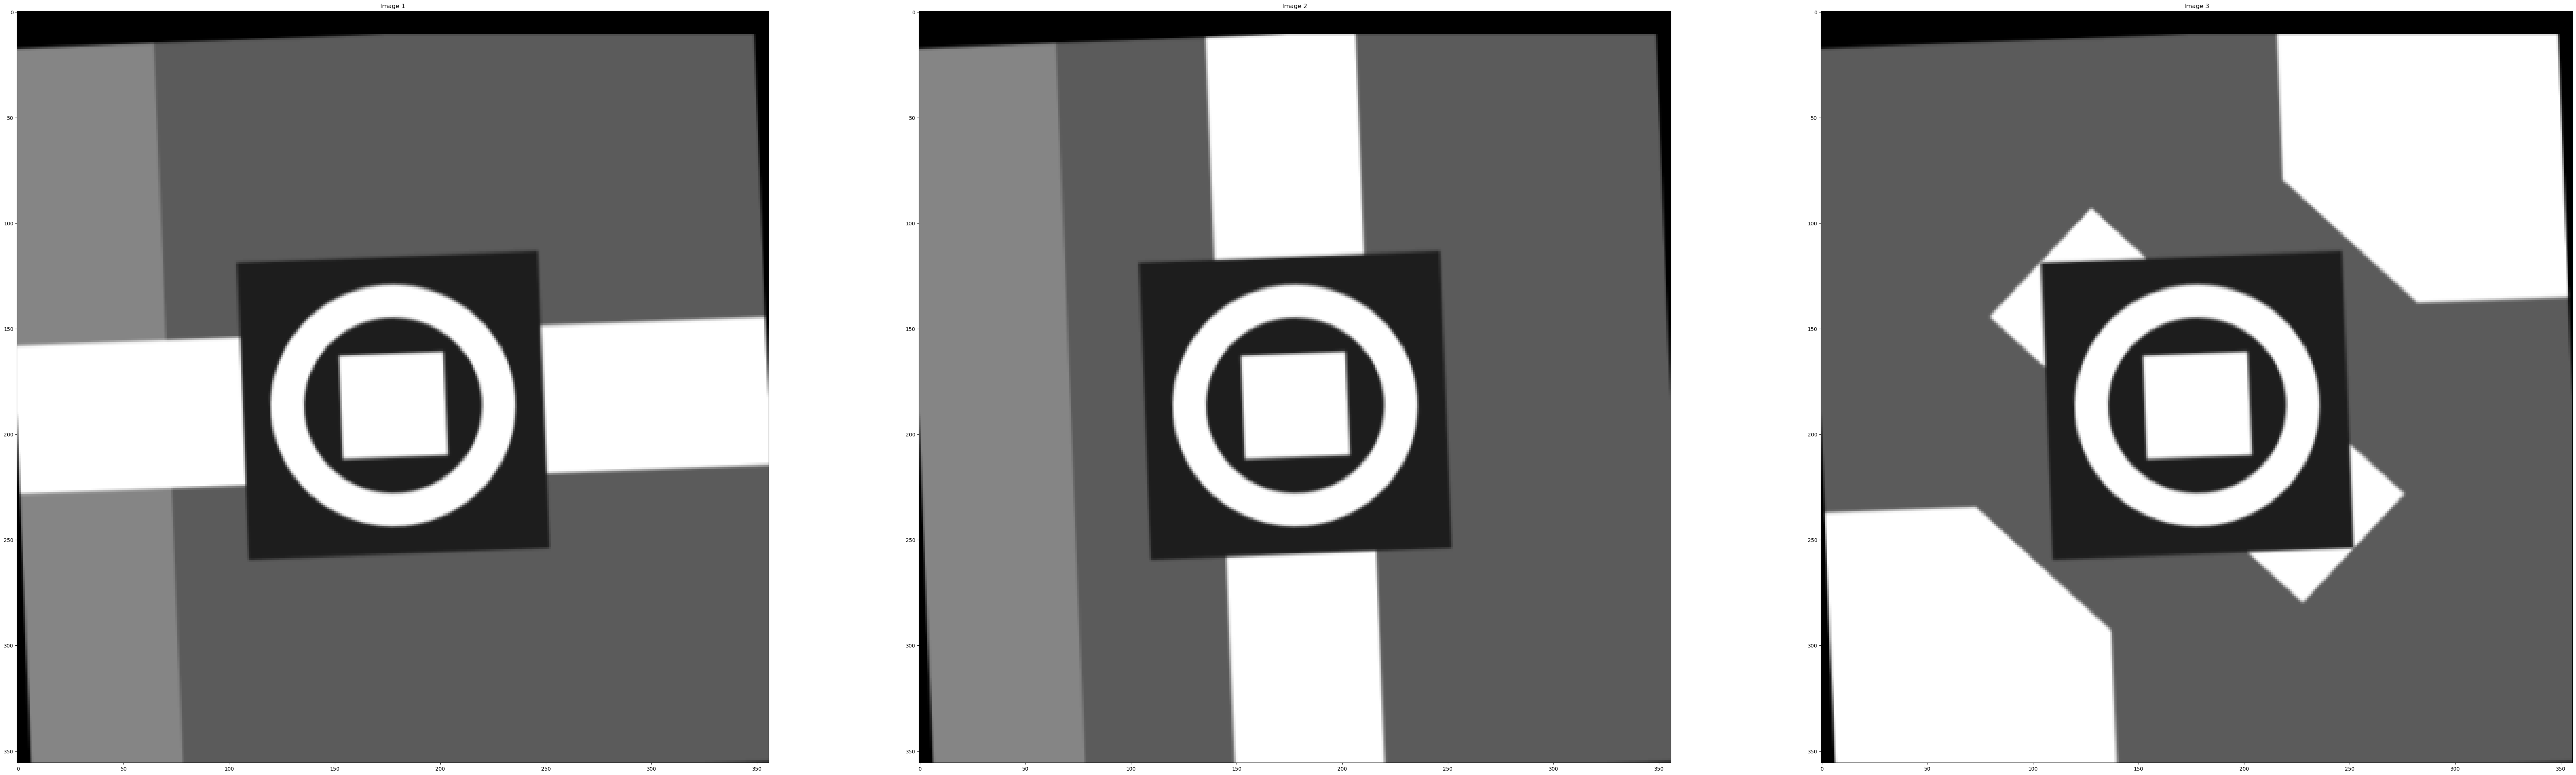

{'resize_rate': 0.8964962839301157, 'rotate_angle': 0, 'selected_translation': 'left-right', 'translation_rate': 0.024482334794266453, 'selected_perspective': 'pitch', 'pitch_rate1': 0.09182010884783678, 'pitch_rate2': -0.048150093807684674, 'stretch_rate1': -0.014478013467902888, 'stretch_rate2': -0.014370025891063343}


In [7]:
import torch
import torch.nn.functional as F
from torchvision.transforms.functional import perspective as perspective_transform
from torchvision.transforms.functional import rotate, resize
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = r"C:\Users\LinziGoooosh\Desktop\b01.png"
image2_path = r"C:\Users\LinziGoooosh\Desktop\b02.png"
image3_path = r"C:\Users\LinziGoooosh\Desktop\b03.png"
image = Image.open(image_path).convert("L")  # 转换为灰度模式
image2 = Image.open(image2_path).convert("L")
image3 = Image.open(image3_path).convert("L")

# 获取图像的高度和宽度
width, height = image.size
# Combine images into a single RGB image
combined_image = np.array([np.array(image), np.array(image2), np.array(image3)])
print(combined_image.shape)
combined_image = torch.tensor(combined_image, dtype=torch.float32)
# padding50
original_image = combined_image
raw_combined_image = F.pad(combined_image, (100, 100, 100, 100), mode='replicate')
options_log = {}
    

# -------------- resize_images -------------- #
resize_prob = 0.9
resize_range = [0.8, 1.2]  # 图像尺寸百分比

if np.random.uniform(0, 1) < resize_prob:
    resize_rate = np.random.uniform(resize_range[0], resize_range[1])
    combined_image = resize(combined_image, (int(height * resize_rate), int(width * resize_rate)), interpolation=InterpolationMode.BILINEAR, antialias=True)
    options_log["resize_rate"] = resize_rate
else:
    options_log["resize_rate"] = 1

# -------------- rotation_transform -------------- #
rotate_prob = 0.5
rotate_range = [-5, 5] # the range of rotation(旋转范围)

if np.random.uniform(0, 1) < rotate_prob:
    rotate_angle = np.random.uniform(rotate_range[0], rotate_range[1])
    combined_image = rotate(combined_image, rotate_angle, interpolation = InterpolationMode.BILINEAR)
    options_log["rotate_angle"] = rotate_angle
else:
    options_log["rotate_angle"] = 0

# -------------- translation_transform -------------- #
translation_prob = [0.6, 0.3, 0.1]  # left-right, up-down, keep
translation_range = [-0.1, 0.1]  # 图像尺寸百分比

# 随机选取平移的形式和值
selected_translation = np.random.choice(["left-right", "up-down", "keep"], p=translation_prob)
translation_rate = np.random.uniform(-translation_range[0], translation_range[0])

if selected_translation == "left-right":
    combined_image = combined_image.roll(int(translation_rate * width), 2)
    options_log["selected_translation"] = "left-right"
    options_log["translation_rate"] = translation_rate
elif selected_translation == "up-down":
    combined_image = combined_image.roll(int(translation_rate * height), 1)
    options_log["selected_translation"] = "up-down"
    options_log["translation_rate"] = translation_rate
else:
    options_log["selected_translation"] = "keep"
    options_log["translation_rate"] = 0


# -------------- perspective_transform -------------- #

# Resize images to have the same dimensions
# width, height = image.size
# image2 = image2.resize((width, height))

# 定义透视和拉伸的概率与范围
perspective_prob = [0.3, 0.3, 0.4]  # pitch, yaw, keep
perspective_range = [-0.1, 0.1]  # 图像尺寸百分比
stretch_prob = 0.4
stretch_range = [-0.05, 0.05]  # 图像尺寸百分比

# 随机选取透视变换的形式和值
selected_perspective = np.random.choice(["pitch", "yaw", "keep"], p=perspective_prob)
pitch_rate1 = np.random.uniform(-perspective_range[0], perspective_range[0])
pitch_rate2 = np.random.uniform(-perspective_range[0], perspective_range[0])
yaw_rate1 = np.random.uniform(-perspective_range[1], perspective_range[1])
yaw_rate2 = np.random.uniform(-perspective_range[1], perspective_range[1])

# 随机选取拉伸的形式和值
if np.random.uniform(0, 1) < stretch_prob:
    stretch_rate1 = np.random.uniform(stretch_range[0], stretch_range[1])
    stretch_rate2 = np.random.uniform(stretch_range[0], stretch_range[1])
else:
    stretch_rate1 = 0
    stretch_rate2 = 0

# 定义变形的目标点
raw_pts = [[0, 0], [width, 0], [0, height], [width, height]]
if selected_perspective == "pitch":
    pitch_pts = [
        [0 - pitch_rate1 * width, 0 - stretch_rate1 * height],
        [width + pitch_rate1 * width, 0 - stretch_rate1 * height],
        [0 - pitch_rate2 * width, height + stretch_rate2 * height],
        [width + pitch_rate2 * width, height + stretch_rate2 * height],
    ]
    yaw_pts = raw_pts
    options_log["selected_perspective"] = "pitch"
    options_log["pitch_rate1"] = pitch_rate1
    options_log["pitch_rate2"] = pitch_rate2
    options_log["stretch_rate1"] = stretch_rate1
    options_log["stretch_rate2"] = stretch_rate2

elif selected_perspective == "yaw":
    yaw_pts = [
        [0 - stretch_rate1 * width, 0 - yaw_rate1 * height],
        [width + stretch_rate2 * width, 0 - yaw_rate2 * height],
        [0 - stretch_rate1 * width, height + yaw_rate1 * height],
        [width + stretch_rate2 * width, height + yaw_rate2 * height],
    ]
    pitch_pts = raw_pts
    options_log["selected_perspective"] = "yaw"
    options_log["yaw_rate1"] = yaw_rate1
    options_log["yaw_rate2"] = yaw_rate2
    options_log["stretch_rate1"] = stretch_rate1
    options_log["stretch_rate2"] = stretch_rate2

else:  # selected_perspective == 'keep'
    pitch_pts = raw_pts
    yaw_pts = raw_pts
    stretch_pts = [
        [0 , 0 - stretch_rate1 * height],
        [width, 0 - stretch_rate1 * height],
        [0 , height + stretch_rate2 * height],
        [width, height + stretch_rate2 * height],
    ]
    options_log["selected_perspective"] = "keep"
    options_log["stretch_rate1"] = stretch_rate1
    options_log["stretch_rate2"] = stretch_rate2

# 转换为 PyTorch Tensor
'''
raw_pts = torch.tensor(raw_pts, dtype=torch.float32)
pitch_pts = torch.tensor(pitch_pts, dtype=torch.float32)
yaw_pts = torch.tensor(yaw_pts, dtype=torch.float32)
stretch_pts = torch.tensor(stretch_pts, dtype=torch.float32)
'''
# 进行透视变换
if selected_perspective == "pitch":
    combined_result = perspective_transform(combined_image, raw_pts, pitch_pts)
elif selected_perspective == "yaw":
    combined_result = perspective_transform(combined_image, raw_pts, yaw_pts)
else:
    combined_result = perspective_transform(combined_image, raw_pts, stretch_pts)


def random_motion_transform(image, width, height,
                            resize_prob = 0.3, resize_range = [0.8, 1.2],
                            rotate_prob = 0.6, rotate_range = [-5, 5],
                            translation_prob = [0.2, 0.2, 0.6], translation_range = [-0.1, 0.1],
                            perspective_prob = [0.4, 0.3, 0.3], perspective_range = [-0.1, 0.1],
                            stretch_prob = 0.5, stretch_range = [-0.05, 0.05]):
    # 旋转图像 rotate
    if np.random.uniform(0, 1) < rotate_prob:
        rotate_angle = np.random.uniform(rotate_range[0], rotate_range[1])
        out = rotate(image, rotate_angle, interpolation=InterpolationMode.BILINEAR)
    else:
        out = image
    
    # 调整图像尺寸 resize
    if np.random.uniform(0, 1) < resize_prob:
        resize_rate = np.random.uniform(resize_range[0], resize_range[1])
        out = resize(out, (int(height * resize_rate), int(width * resize_rate)), interpolation=InterpolationMode.BILINEAR, antialias=True)
    else:
        out = out
    
    # 平移图像 translation
    translation_type = np.random.choice(["left-right", "up-down", "keep"], p=translation_prob)
    translation_rate = np.random.uniform(-translation_range[0], translation_range[0])
    if translation_type == "left-right":
        out = out.roll(int(translation_rate * width), 2)
    elif translation_type == "up-down":
        out = out.roll(int(translation_rate * height), 1)
    else:
        out = out
        
    # 透视变换 perspective
    original_pts = [[0, 0], [width, 0], [0, height], [width, height]]
    perspective_type = np.random.choice(["pitch", "yaw", "keep"], p=perspective_prob)
    pitch_rate1 = np.random.uniform(-perspective_range[0], perspective_range[0])
    pitch_rate2 = np.random.uniform(-perspective_range[0], perspective_range[0])
    yaw_rate1 = np.random.uniform(-perspective_range[1], perspective_range[1])
    yaw_rate2 = np.random.uniform(-perspective_range[1], perspective_range[1])
    if np.random.uniform(0, 1) < stretch_prob:
        stretch_rate1 = np.random.uniform(stretch_range[0], stretch_range[1])
        stretch_rate2 = np.random.uniform(stretch_range[0], stretch_range[1])
    else:
        stretch_rate1 = 0
        stretch_rate2 = 0
    if perspective_type == "pitch":
        pitch_pts = [
            [0 - pitch_rate1 * width, 0 - stretch_rate1 * height],
            [width + pitch_rate1 * width, 0 - stretch_rate1 * height],
            [0 - pitch_rate2 * width, height + stretch_rate2 * height],
            [width + pitch_rate2 * width, height + stretch_rate2 * height],
        ]
        yaw_pts = original_pts
        out = perspective_transform(out, original_pts, pitch_pts)
    elif perspective_type == "yaw":
        yaw_pts = [
            [0 - stretch_rate1 * width, 0 - yaw_rate1 * height],
            [width + stretch_rate2 * width, 0 - yaw_rate2 * height],
            [0 - stretch_rate1 * width, height + yaw_rate1 * height],
            [width + stretch_rate2 * width, height + yaw_rate2 * height],
        ]
        pitch_pts = original_pts
        out = perspective_transform(out, original_pts, yaw_pts)
    else:
        pitch_pts = original_pts
        yaw_pts = original_pts
        stretch_pts = [
            [0 , 0 - stretch_rate1 * height],
            [width, 0 - stretch_rate1 * height],
            [0 , height + stretch_rate2 * height],
            [width, height + stretch_rate2 * height],
        ]
        out = perspective_transform(out, original_pts, stretch_pts)
        
    return out

out_image = random_motion_transform(raw_combined_image, width, height)
combined_result = out_image

# 水平对比展示原始图像和变形后的图像
# Iterate through the stack of images and display them
plt.figure(figsize=(90, 30))

for i in range(combined_result.shape[0]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(combined_result[i], cmap="gray")  # Assuming images are grayscale
    plt.title(f"Image {i+1}")

plt.show()
print(options_log)

In [25]:
from PIL import Image
import numpy as np

# 读取两张图片
image_path = r'C:\Users\LinziGoooosh\Desktop\b55_1311_Slice--1.png'
image2_path = r'C:\Users\LinziGoooosh\Desktop\b55_1583_Slice--1.png'

image1 = Image.open(image_path).convert('L')  # 转换为灰度模式
image2 = Image.open(image2_path).convert('L')
print(image1.size)
print(image2.size)

# 将图片调整为相同的大小（320，320）
image1 = image1.resize((320, 320))
image2 = image2.resize((320, 320))

# 将图片转换为 NumPy 数组
img1_array = np.array(image1)
print(img1_array.shape)
img2_array = np.array(image2)

# 将两个数组合并成一个形状为（2，320，320）的张量
combined_tensor = np.array([img1_array, img2_array])

print(combined_tensor.shape)


(320, 320)
(320, 320)
(320, 320)
(2, 320, 320)


In [23]:
from PIL import Image
import os

# 设置输入和输出目录
input_directory = r'W:\Real-ESRGAN\datasets\random_fastMRI01\val\processed_images'
output_directory = r'W:\Real-ESRGAN\datasets\random_fastMRI01\val\cropped_images'

# 确保输出目录存在
os.makedirs(output_directory, exist_ok=True)

# 定义裁剪的尺寸（假设要裁剪为正方形）
crop_size = 400

# 遍历输入目录中的PNG文件
for filename in os.listdir(input_directory):
    if filename.endswith(".png"):
        # 构建输入文件的完整路径
        input_path = os.path.join(input_directory, filename)

        # 打开图像
        image = Image.open(input_path)

        # 获取图像的尺寸
        width, height = image.size

        # 计算裁剪的左上角坐标
        left = (width - crop_size) // 2
        top = (height - crop_size) // 2

        # 计算裁剪的右下角坐标
        right = (width + crop_size) // 2
        bottom = (height + crop_size) // 2

        # 中心裁剪图像
        cropped_image = image.crop((left, top, right, bottom))

        # 构建输出文件的完整路径
        output_path = os.path.join(output_directory, filename)

        # 保存裁剪后的图像
        cropped_image.save(output_path)

        # 关闭图像
        image.close()

print("中心裁剪完成。")


中心裁剪完成。


In [22]:
import os
import cv2
import numpy as np

# 输入目录和输出目录
input_directory = r'W:\Real-ESRGAN\datasets\random_fastMRI01\val\raw_image_F01'
output_directory = r'W:\Real-ESRGAN\datasets\random_fastMRI01\val\processed_images'

# 确保输出目录存在
os.makedirs(output_directory, exist_ok=True)

# 目标宽度和目标尺寸
target_width = 400
target_size = (target_width, target_width)

# 获取所有PNG文件
png_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]

for png_file in png_files:
    # 读取图像
    image_path = os.path.join(input_directory, png_file)
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # 计算填充大小
    current_width = img.shape[1]
    padding_left = max(0, (target_width - current_width) // 2)
    padding_right = max(0, target_width - current_width - padding_left)

    # 使用replicate模式进行宽度填充
    padded_img = cv2.copyMakeBorder(img, 0, 0, padding_left, padding_right, cv2.BORDER_REPLICATE)

    # 中心裁剪为正方形
    center_x = padded_img.shape[1] // 2
    center_crop = padded_img[:, center_x - target_width // 2:center_x + target_width // 2]

    # 保存处理后的图像
    output_path = os.path.join(output_directory, png_file)
    cv2.imwrite(output_path, center_crop)

print("处理完成")


处理完成
